# Instacart Market Basket Analysis

## Exploratory Data Analysis

* Identify the total users, orders, most selling products
* Identifying the products that are getting reordered
* Identifying the day of the week where customers making more orders
* Identifying hour of the day where customers making more orders

In [263]:
# Importing Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

In [265]:
# Data Loading 
orders = pd.read_csv('orders_data.csv')
orders = orders[orders['eval_set']=='train']

In [9]:
orders.sample(5)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department,aisle-department
2190260,2161340,96281,prior,3,0,9,18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3176049,989435,140031,prior,1,5,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1151782,1368453,50743,train,60,2,17,1.0,29270.0,5.0,1.0,Beet Apple Carrot Lemon Ginger Organic Cold Pr...,31.0,7.0,refrigerated,beverages,refrigerated beverages
3444460,448584,151853,prior,10,6,12,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
143753,2704983,6383,prior,27,2,12,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
print ('Total Orders are {}, Total users are {}'.format(orders['order_id'].nunique(),orders['user_id'].nunique()))

Total Orders are 3421083, Total users are 206209


### Finding Top products based on orders 

In [47]:
print ('Top 5 products by orders')
orders.groupby('product_name',sort =False)['order_id'].count().sort_values(ascending=False).head(5)

Top 5 products by orders


product_name
Banana                    18726
Bag of Organic Bananas    15480
Organic Strawberries      10894
Organic Baby Spinach       9784
Large Lemon                8135
Name: order_id, dtype: int64

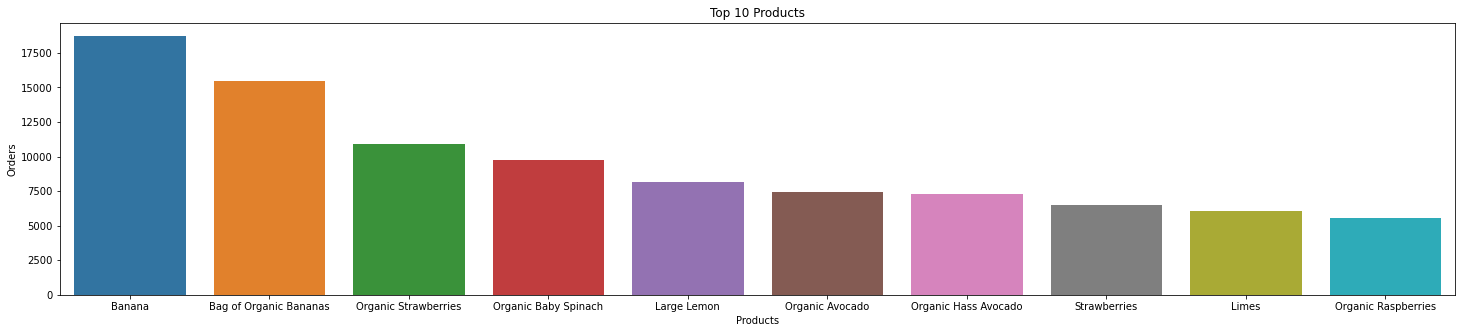

In [60]:
products_top10 = orders.groupby('product_name',sort =False)['order_id'].count().sort_values(ascending=False).head(10)

plt.figure(figsize=(25,5))
_=sns.barplot(products_top10.index, products_top10.values)
_=plt.xlabel('Products')
_=plt.ylabel('Orders')
_=plt.title('Top 10 Products')

In [53]:
products_top10

product_name
Banana                    18726
Bag of Organic Bananas    15480
Organic Strawberries      10894
Organic Baby Spinach       9784
Large Lemon                8135
Organic Avocado            7409
Organic Hass Avocado       7293
Strawberries               6494
Limes                      6033
Organic Raspberries        5546
Organic Blueberries        4966
Organic Whole Milk         4908
Organic Cucumber           4613
Organic Zucchini           4589
Organic Yellow Onion       4290
Organic Garlic             4158
Seedless Red Grapes        4059
Asparagus                  3868
Organic Grape Tomatoes     3823
Organic Red Onion          3818
Name: order_id, dtype: int64

### When orders are made? in which day of week?

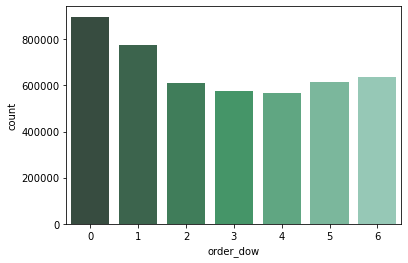

In [30]:
sns.countplot(x='order_dow',data = orders ,palette=sns.color_palette("BuGn_d",7))

__It looks as though 0 represents Saturday and 1 represents Sunday. Wednesday is then the least popular day to make orders.__

### Identifying the hour of a day when most orders are made?

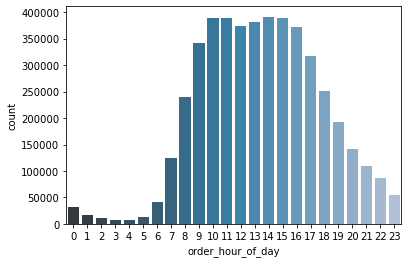

In [29]:
sns.countplot(x='order_hour_of_day',data = orders, palette=sns.color_palette("PuBu_d", 24) )

The 10 AM - 12 PM hour is the most popular time frame to make orders, followed by a dip around lunch time and a pickup in the afternoon.

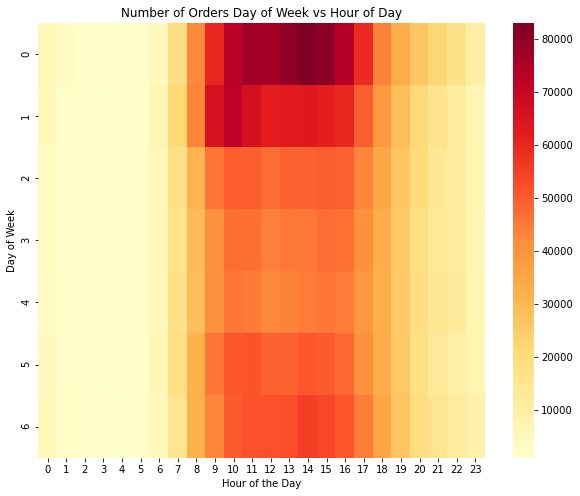

In [32]:
group_hour_dow = orders.groupby(['order_dow', 'order_hour_of_day'])['order_number'].aggregate('count').reset_index()
group_hour_dow = group_hour_dow.pivot('order_dow', 'order_hour_of_day', 'order_number')

plt.figure(figsize=(10,8))

sns.heatmap(group_hour_dow, cmap='YlOrRd')

plt.ylabel('Day of Week')
plt.xlabel('Hour of the Day')
plt.title('Number of Orders Day of Week vs Hour of Day')
plt.show()

__Saturday afternoon and Sunday morning are the most popular time to make orders.__

## Avg Days since prior day

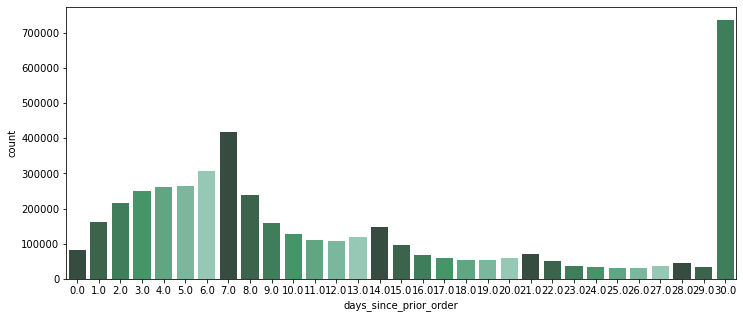

In [35]:
plt.figure(figsize=(12,5))
sns.countplot(x='days_since_prior_order',data = orders ,palette=sns.color_palette("BuGn_d",7))

In [39]:
print ('Avg days of order sine prior order is {} days'.format(int(orders['days_since_prior_order'].mean())))

Avg days of order sine prior order is 12 days


### Count of Users by Number of Prior Orders

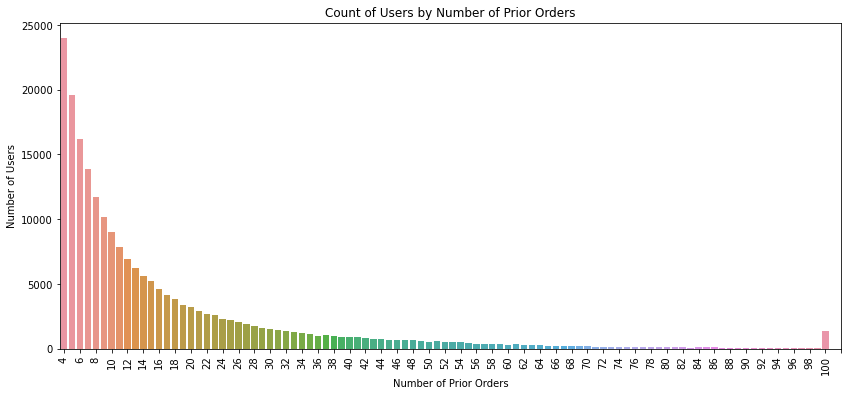

In [41]:
group_user_orders = orders.groupby('user_id')['order_number'].aggregate('max').reset_index()

# sns hist may be better; but possible to make bin size 1?

plt.figure(figsize=(14,6))

sns.barplot(x=group_user_orders['order_number'].value_counts().index, y=group_user_orders['order_number'].value_counts().values)

plt.title('Count of Users by Number of Prior Orders')
plt.xlabel('Number of Prior Orders')
plt.ylabel('Number of Users')
# Did not find a great way in seaborn to make tick labels for every other step; maybe try using xmin(), xmax() or just pandas:
plt.xticks(range(0, 99, 2), range(4,101,2), rotation='vertical')
plt.show()

### Distribution of Add to cart

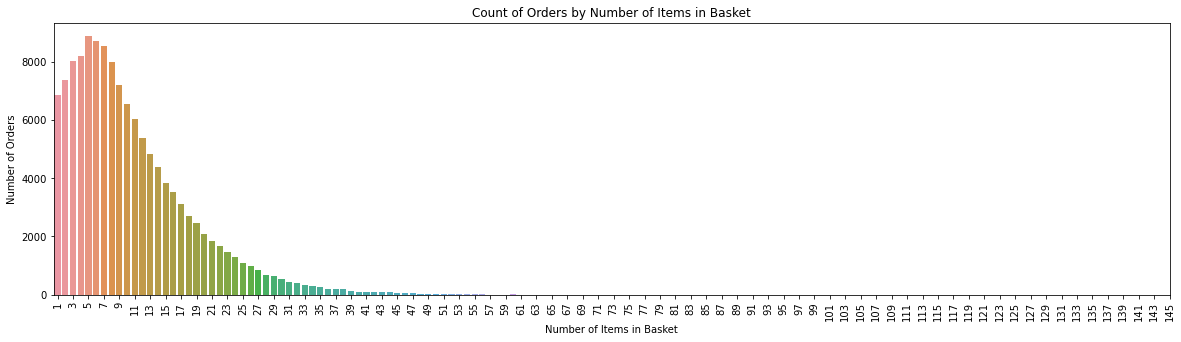

In [46]:

order_sizes = orders.reset_index().groupby(['user_id', 'order_number'])['add_to_cart_order'].aggregate('max')

plt.figure(figsize=(20,5))

sns.barplot(order_sizes.value_counts().index, order_sizes.value_counts().values)

plt.title('Count of Orders by Number of Items in Basket')
plt.xlabel('Number of Items in Basket')
plt.ylabel('Number of Orders')
# Did not find a great way in seaborn to make tick labels for every other step; maybe try using xmin(), xmax() or just pandas:
plt.xticks(range(0, 145, 2), range(1,146,2), rotation='vertical')
plt.show()

In [61]:
orders.head(5)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department,aisle-department
0,2539329,1,prior,1,2,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2398795,1,prior,2,3,7,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,473747,1,prior,3,3,12,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2254736,1,prior,4,4,7,29.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,431534,1,prior,5,4,15,28.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Top 10 Orders by Aisle - Departments

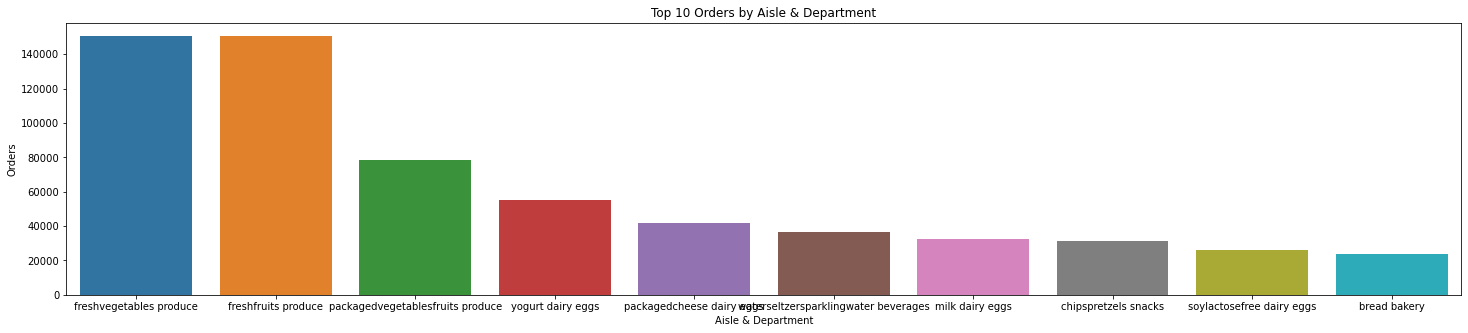

In [67]:
orders_top10 = orders.groupby('aisle-department',sort =False)['order_id'].count().sort_values(ascending=False).head(10)

plt.figure(figsize=(25,5))
_=sns.barplot(orders_top10.index, orders_top10.values)
_=plt.xlabel('Aisle & Department')
_=plt.ylabel('Orders')
_=plt.title('Top 10 Orders by Aisle & Department')

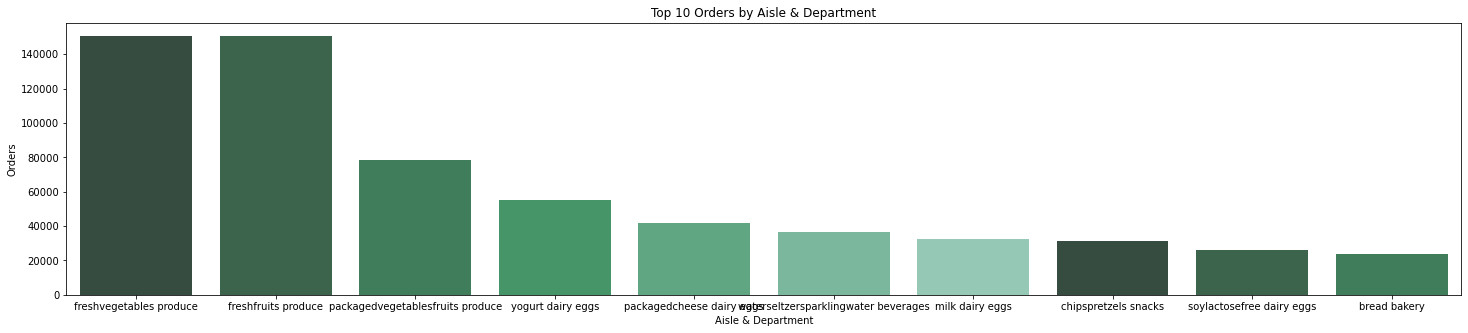

In [65]:
orders_dept_top10 = pd.DataFrame(orders.groupby('department',sort =False)['order_id'].count()).head(10)

plt.figure(figsize=(25,5))
_=sns.barplot(orders_top10.index, orders_top10.values, )
_=plt.xlabel('Aisle & Department')
_=plt.ylabel('Orders')
_=plt.title('Top 10 Orders by Aisle & Department')

In [79]:
total_rows = len(orders) - len(orders[orders['product_id'].isnull()])
departments_pct = pd.DataFrame(orders.groupby('department',sort =False)['order_id'].count())

departments_pct = departments_pct.reset_index()

departments_pct['total'] = total_rows

departments_pct['total_perc'] = (departments_pct['order_id']/departments_pct['total'] )*100

In [80]:
departments_pct

,department,order_id,total,total_perc
0,dairy eggs,217051,1384617,15.675887
1,beverages,114046,1384617,8.236646
2,snacks,118862,1384617,8.584468
3,household,35986,1384617,2.598986
4,breakfast,29500,1384617,2.130553
5,produce,409087,1384617,29.545138
6,frozen,100426,1384617,7.252980
7,deli,44291,1384617,3.198791
8,canned goods,46799,1384617,3.379924
9,personal care,21570,1384617,1.557832


## Reorders

In [101]:
orders = orders[orders['eval_set']=='train']

In [105]:
orders.dtypes

order_id                    int64
user_id                     int64
eval_set                   object
order_number                int64
order_dow                   int64
order_hour_of_day           int64
days_since_prior_order    float64
product_id                float64
add_to_cart_order         float64
reordered                 float64
product_name               object
aisle_id                  float64
department_id             float64
aisle                      object
department                 object
aisle-department           object
dtype: object

In [103]:
orders['reordered'].value_counts()

1.0    828824
0.0    555793
Name: reordered, dtype: int64

### How many items are reordered


In [107]:
orders[orders['reordered']== 1]['product_id'].nunique()

30176

#### Top 10 items most likely to re-order

In [185]:
product_reorders.head(10)

,reordered
product_name,
Organic Half & Half,2129.0
Zero Calorie Cola,285.0
Soda,1221.0
0% Greek Strained Yogurt,329.0
Aged White Cheddar Popcorn,77.0
Milk Chocolate Almonds,208.0
XL Pick-A-Size Paper Towel Rolls,62.0
Pistachios,78.0
Cinnamon Toast Crunch,116.0


### Hypothesis Testing

#### 1. all products that are ordered are re-ordered 50% of the time

__Null Hypothesis: Avg Reordered percentage is greater than 50%
Alternate Hypothesis : Avg Reordered percentage is NOT greater than 50%__

In [187]:
product_orders = pd.DataFrame(orders.groupby('product_name',sort =False)['order_id'].count())

In [196]:
reorders_pct = pd.merge(product_reorders,product_orders,on ='product_name')
reorders_pct['reorder_pct'] = (reorders_pct['reordered']/reorders_pct['order_id']) * 100

In [198]:
reorders_pct['reorder_pct'].mean() # On an avg all products are re-ordered more than 50%

56.38695250495421

In [226]:
reorders_pct['reorder_pct'].std()

23.83556901996234

In [254]:
reorders_pct

,reordered,order_id,reorder_pct
product_name,,,
Organic Half & Half,2129.0,2646,80.461073
Zero Calorie Cola,285.0,347,82.132565
Soda,1221.0,1507,81.021898
0% Greek Strained Yogurt,329.0,413,79.661017
Aged White Cheddar Popcorn,77.0,136,56.617647
...,...,...,...
Original Canola Cooking Spray,1.0,6,16.666667
Organic Savory Beef Gravy,1.0,4,25.000000
Honey Stix,1.0,2,50.000000


### 1 Sample t test

__Null Hypothesis: Avg Reordered percentage is greater than 50%
Alternate Hypothesis : Avg Reordered percentage is NOT greater than 50%__

In [209]:
reorder_product_percentages = reorders_pct['reorder_pct']
ro_pct =[]

def get_sample(list1,n):
    return np.random.choice(list1,n)

for i in range(10000):
    ro_pct.append(np.mean(get_sample(reorder_product_percentages,100)))

In [210]:
# checking data is normally distributed
stats.normaltest(ro_pct)

NormaltestResult(statistic=2.2207910255532903, pvalue=0.3294286420685409)

In [ ]:
# SInce p-value is > alpha(0.05), it fails to reject the NULL Hypothesis, so data is normally distributed

In [247]:

test_stats,p_value = stats.ttest_1samp(ro_pct,50)

In [250]:
test_statistics = (50- 56.38) / (23.83/ np.sqrt(len(ro_pct)))
test_statistics

-26.7729752412925

In [224]:
test_stats,p_value 

(270.20194228654356, 0.0)

__Conclusion of Hypothesis Testing : This shows all products are not having reorder pct > 50%__

### 2. Hypothesis Testing

__Null Hypothesis :There is no difference between weekend and weekdays orders 
Alternate Hypothesis: More orders are created on weekends when compared to weekdays__

#### 2 sample t test

In [272]:
day_orders = pd.DataFrame(orders.groupby(['order_dow','user_id'])['order_id'].count().reset_index())
day_orders.columns = ['order_dow','user_id','orders']

In [273]:
day_orders.head() # 0 is Saturday, 1 is Sunday and so on

,order_dow,user_id,orders
0,0,5,9
1,0,10,4
2,0,13,5
3,0,24,1
4,0,37,12


In [278]:
# 2 populations
weekend_orders = day_orders[(day_orders['order_dow'] == 0 ) | (day_orders['order_dow'] == 1)]['orders']
weekday_orders = day_orders[(day_orders['order_dow'] != 0 ) & (day_orders['order_dow'] != 1)]['orders']

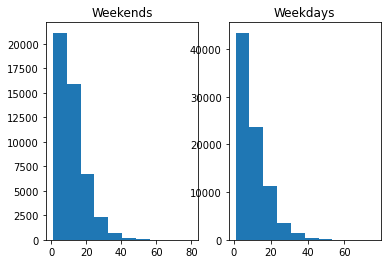

In [281]:
plt.subplot(1,2,1)
_=plt.hist(weekend_orders)
_=plt.title('Weekends')
plt.subplot(1,2,2)
_=plt.hist(weekday_orders)
_=plt.title('Weekdays')

In [ ]:
# Checking whether data is normally distributed or not
# Null Hypo: Data normally distributed
# Atlernate Hypo : Data not normally distributed

In [280]:
stats.normaltest(weekend_orders)
stats.normaltest(weekday_orders) # Data is not normally distributed

NormaltestResult(statistic=24787.54176540687, pvalue=0.0)

In [286]:
# Bootstrapping

weekend_sample =[]
weekday_sample =[]

def get_sample(list1,n):
    return np.random.choice(list1,n)

for i in range(100):
    weekend_sample.append(np.mean(get_sample(weekend_orders,100)))
    weekday_sample.append(np.mean(get_sample(weekday_orders,100)))

In [287]:
stats.normaltest(weekend_sample), stats.normaltest(weekday_sample)

(NormaltestResult(statistic=3.5590697391469086, pvalue=0.16871660424691584),
 NormaltestResult(statistic=3.2910137367494263, pvalue=0.19291475561953494))

In [ ]:
# Failed to Reject the NULL Hypothesis so data is normally distributed

In [288]:
test_stats,p_value = stats.ttest_ind(weekend_sample,weekday_sample)
test_stats,p_value

(9.247512678675012, 3.7413786536621316e-17)

In [ ]:
Since p_value is less than 0.05, reject NULL Hypothesis that There is no difference between weekend and weekdays orders

__Conclusion of Hypothesis Testing is There is a difference between weekend and weekday orders__

## 2. Top re-ordered products by Aisle/Department

In [235]:
reorders.groupby('department',sort =False)['order_id'].count().sort_values(ascending=False).head(10)


department
produce            271886
dairy eggs         146502
beverages           75060
snacks              69102
frozen              56168
bakery              30692
pantry              29498
deli                27367
canned goods        22782
dry goods pasta     18885
Name: order_id, dtype: int64

In [237]:
reorders.groupby('aisle',sort =False)['order_id'].count().sort_values(ascending=False).head(10)

aisle
freshfruits                   110782
freshvegetables                91368
packagedvegetablesfruits       51523
yogurt                         37939
waterseltzersparklingwater     27011
milk                           25864
packagedcheese                 24897
chipspretzels                  18649
soylactosefree                 18046
bread                          16073
Name: order_id, dtype: int64

In [236]:
reorders.columns

Index(['order_id', 'user_id', 'eval_set', 'order_number', 'order_dow',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'aisle', 'department', 'aisle-department'],
      dtype='object')

In [ ]:
# 3. Re-ordered products by dow and hour of day

In [238]:
reorders.groupby('order_dow',sort =False)['order_id'].count().sort_values(ascending=False).head(10)

order_dow
0    197534
1    123376
6    123173
5    107239
2     94469
4     92454
3     90579
Name: order_id, dtype: int64

__This shows most of the reorders happens on Saturday, Sunday and Friday__

In [239]:
reorders.groupby('order_hour_of_day',sort =False)['order_id'].count().sort_values(ascending=False).head(10)

order_hour_of_day
14    70691
11    67835
15    67788
13    67656
10    66992
12    65620
16    64907
9     58497
17    57408
18    44746
Name: order_id, dtype: int64

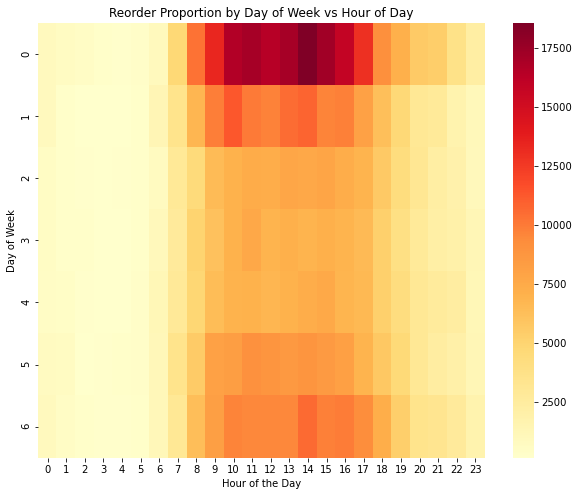

In [243]:
reorder_hour_dow = reorders.groupby(['order_dow', 'order_hour_of_day'])['reordered'].aggregate('count').reset_index()
reorder_hour_dow = reorder_hour_dow.pivot('order_dow', 'order_hour_of_day', 'reordered')

plt.figure(figsize=(10,8))

sns.heatmap(reorder_hour_dow, cmap='YlOrRd')

plt.ylabel('Day of Week')
plt.xlabel('Hour of the Day')
plt.title('Reorder Proportion by Day of Week vs Hour of Day')
plt.show()

__This shows most of the re-order happens on Saturday or sunday noon__

# Conclusions:

* Saturday afternoon and Sunday morning are the most popular time to make orders.
* The 10 AM - 12 PM hour is the most popular time frame to make orders, followed by a dip around lunch time and a pickup in the afternoon.
* Avg days of order since prior order is 12 days
* Using Hypothesis Testing, we could prove that all products are not having reorder pct > 50%
* Most of the re-order happens on Saturday or sunday noon similar to Orders